In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
library(RColorBrewer)
library(wesanderson)
library(ggplot2)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘RColorBrewer’ was built under R version 4.0.5”


In [2]:
# getwd()

In [3]:
nuclei.integrated <- readRDS("./processed_data/nuclei.integrated_1000_7000_30_30_neuron2200_final_2_updated.rds")

In [4]:
#islolate excitatory neurons
Idents(object = nuclei.integrated) <- 'cell_class'
Excita <- subset(nuclei.integrated, idents = 'Excita_neurons')
Excita <- subset(Excita, subset = nFeature_RNA > 2550)

In [5]:
#redo PCA
Excita <- FindVariableFeatures(object = Excita)
Excita <- RunPCA(Excita, features = VariableFeatures(object = Excita))

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”
Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
“number of items to replace is not a multiple of replacement length”
PC_ 1 
Positive:  ZBTB20, ERBB4, SOX2-OT, NDUFA4, LINC02241, SLC9A9, SLC6A1, PREX2, SLC1A3, ATP1A2 
	   SLC1A2, NEAT1, PARD3, NDRG2, SLC24A3, MAML2, SOX6, C1orf61, MBP, GLUL 
	   MSI2, PARD3B, FBXL7, CDH20, DOCK10, DOCK1, DAAM2, PTN, ZNF536, RIN2 
Negative:  IQCJ-SCHIP1, TAFA1, AC011287.1, SV2B, DLGAP1-AS4, BASP1-AS1, ACTN1, SLIT3, AL117329.1, LDB2 
	   NRG1, SATB2, RBFOX3, ARPP21, HOMER1, FSTL4, R3HDM1, PHACTR1, MLIP, PCSK2 
	   LY86-AS1, LINGO2, MIR137HG, TESPA1, NELL2, TMEM132D, GRM7, GRIN2A, CA10, KCNH7 
PC_ 2 
Positive:  IL1RAPL2, CASC15, LINC01524, HS3ST4, RXFP1, AC008415.1, AC109466.1, HS3S

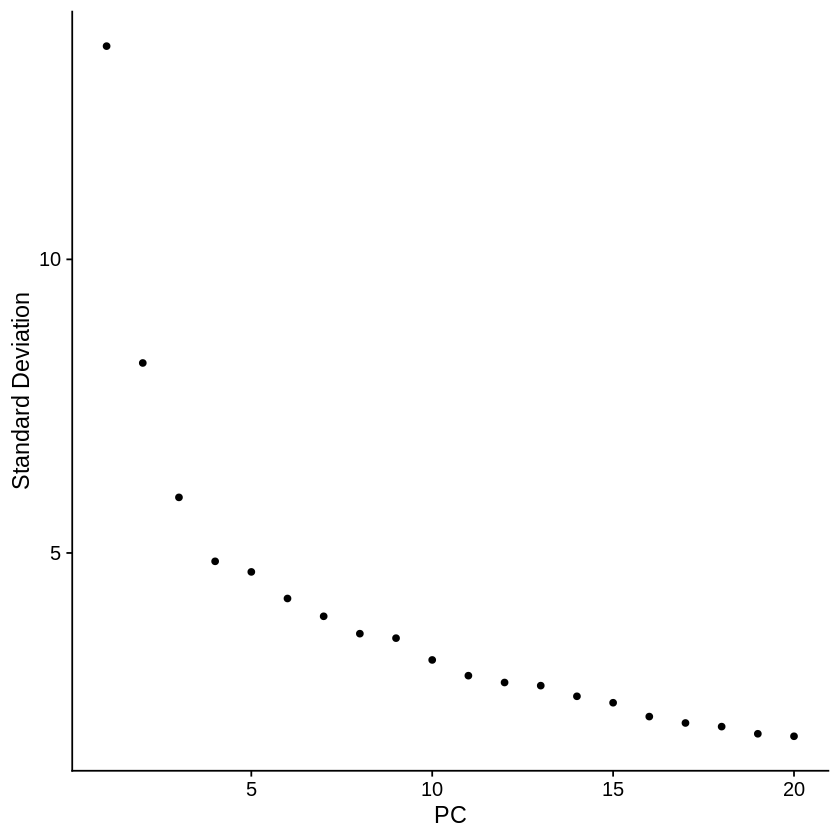

In [6]:
ElbowPlot(Excita)

In [7]:
#redo umap
Excita <- FindNeighbors(Excita, dims = 1:20)
Excita <- RunUMAP(Excita, dims = 1:20)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:26:57 UMAP embedding parameters a = 0.9922 b = 1.112

21:26:57 Read 21101 rows and found 20 numeric columns

21:26:57 Using Annoy for neighbor search, n_neighbors = 30

21:26:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:26:59 Writing NN index file to temp file /tmp/RtmphLuCZS/file64b17a1f4e40

21:26:59 Searching Annoy index using 1 thread, search_k = 3000

21:27:05 Annoy recall = 100%

21:27:05 Commencing smooth kNN distance cal

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 21101
Number of edges: 881882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9421
Number of communities: 14
Elapsed time: 3 seconds


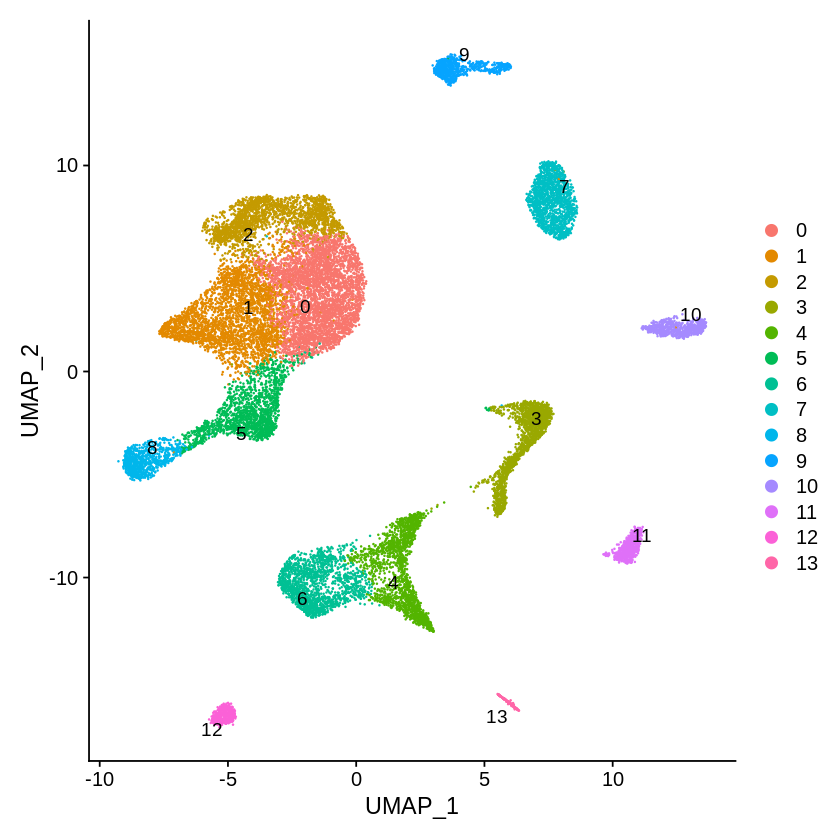

In [8]:
#the clustering parameter was chosen to divide clusters in a way that reflects the layer structure of PFC.
Excita <- FindClusters(Excita, resolution = 0.35)
#ClusterPlot
DimPlot(Excita, reduction = "umap", label = TRUE, repel = TRUE)

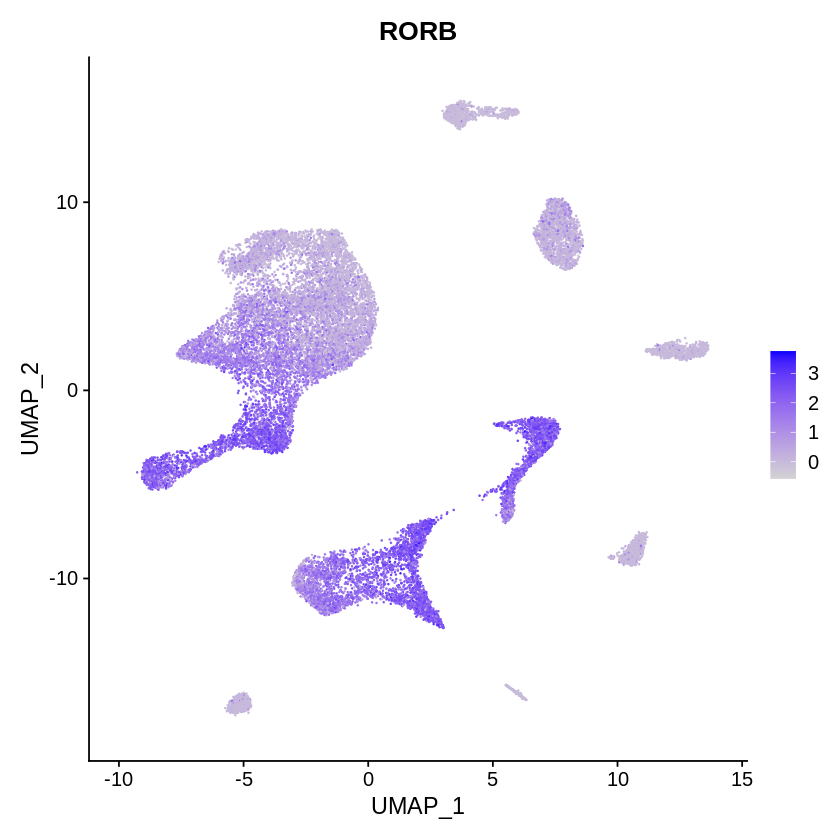

In [9]:
FeaturePlot(Excita, features = c('RORB'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

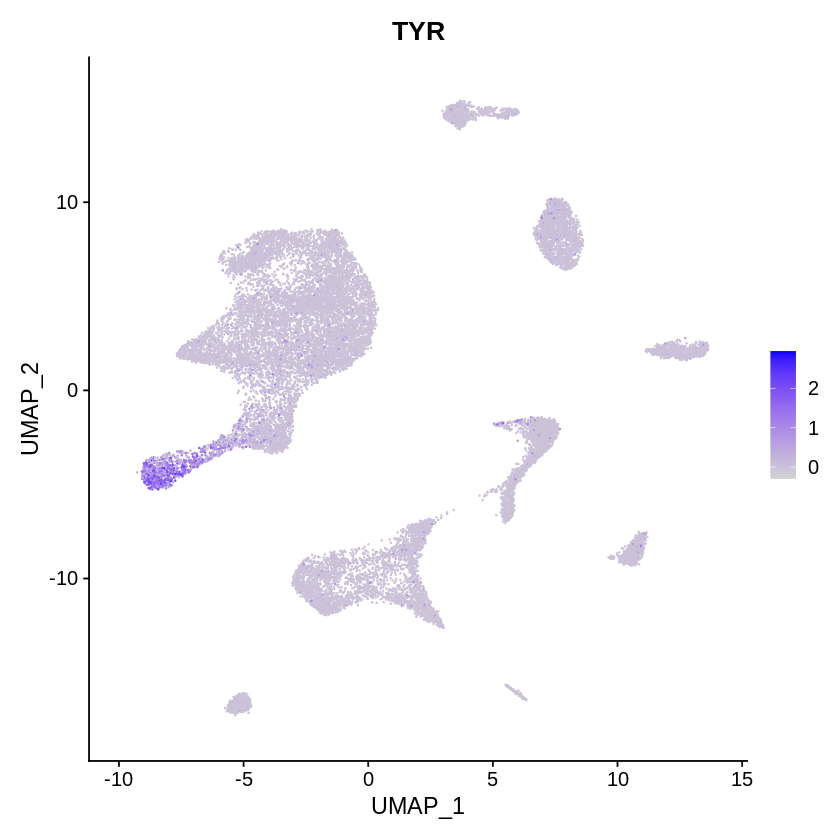

In [10]:
FeaturePlot(Excita, features = c('TYR'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

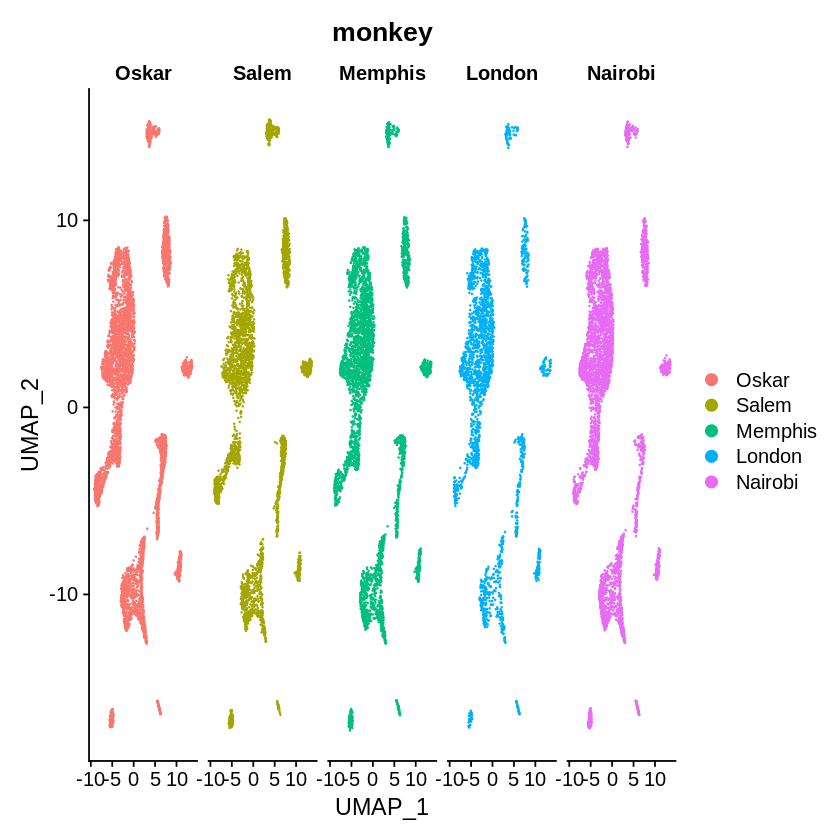

In [11]:
#AnimalPlot
DimPlot(Excita,group.by = "monkey",split.by="monkey")

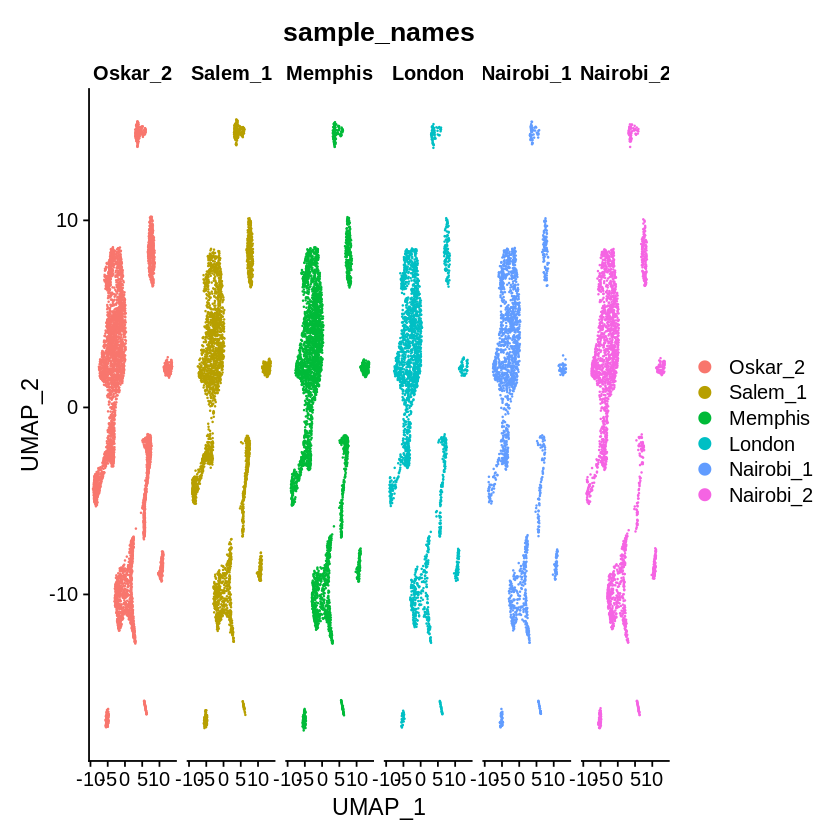

In [12]:
#Sample plots
DimPlot(Excita, reduction = "umap", group.by = "sample_names",split.by="sample_names")

In [13]:
# saveRDS(Excita, file = "./processed_data/excita_1_updated.rds")

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 21101
Number of edges: 881882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9421
Number of communities: 14
Elapsed time: 3 seconds


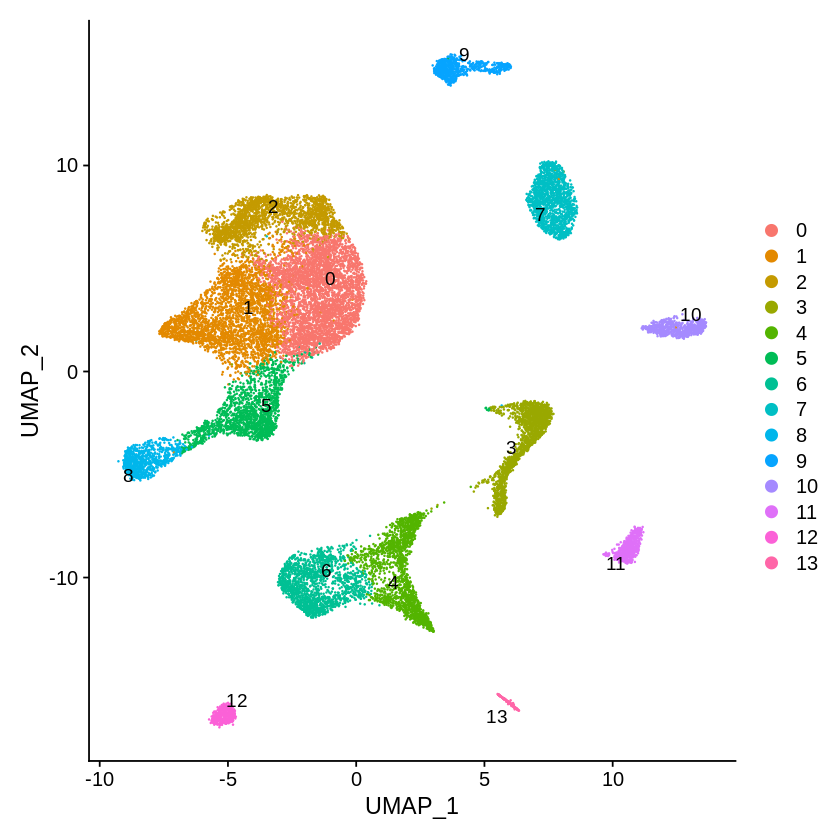

In [14]:
#the clustering parameter was chosen to divide clusters in a way that reflects the layer structure of PFC.
Excita <- FindClusters(Excita, resolution = 0.35)
#ClusterPlot
DimPlot(Excita, reduction = "umap", label = TRUE, repel = TRUE)

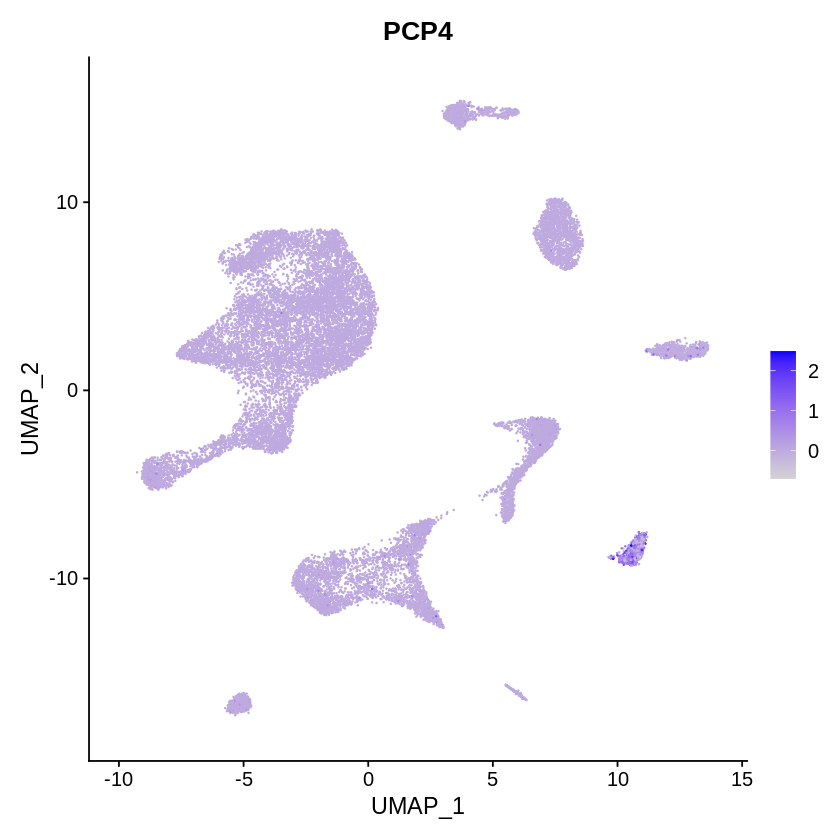

In [19]:
FeaturePlot(Excita, features = c('PCP4'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

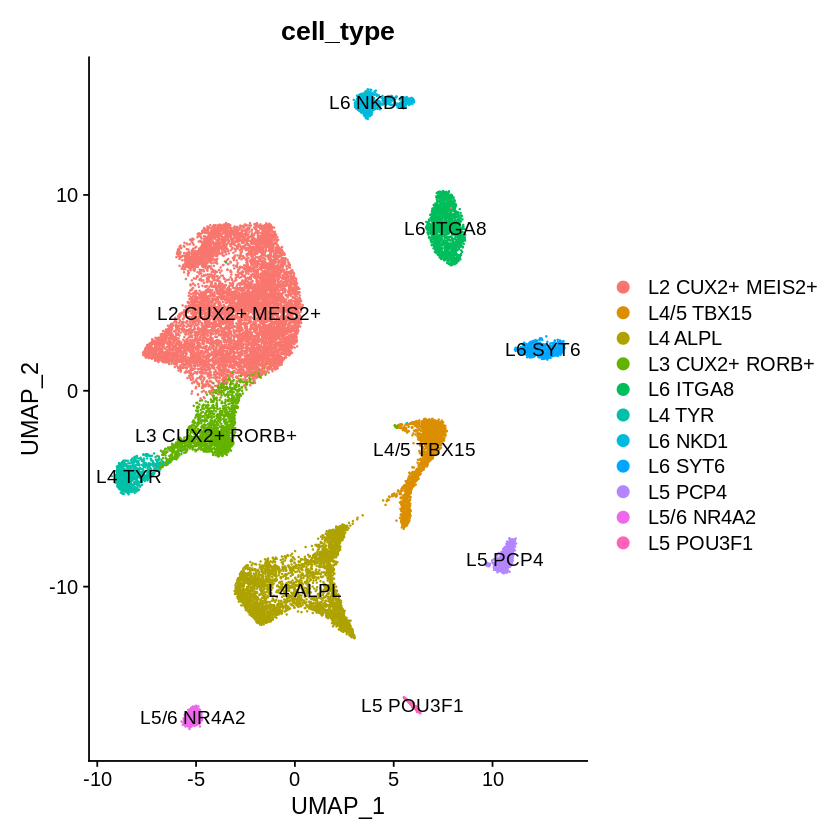

In [20]:
Idents(object = Excita) <- 'integrated_snn_res.0.35'
Excita <- RenameIdents(object = Excita,'0' = 'L2 CUX2+ MEIS2+','1' = 'L2 CUX2+ MEIS2+', '2' = 'L2 CUX2+ MEIS2+', '3' = 'L4/5 TBX15', '4' = 'L4 ALPL','5' = 'L3 CUX2+ RORB+', '6' = 'L4 ALPL', '7' = 'L6 ITGA8','8' = 'L4 TYR','9' = 'L6 NKD1', '10' = 'L6 SYT6', '11' = 'L5 PCP4',
                       '12' = 'L5/6 NR4A2', '13' = 'L5 POU3F1')
Excita@meta.data$cell_type = Idents(object = Excita)
DimPlot(Excita,group.by = "cell_type",label=TRUE)

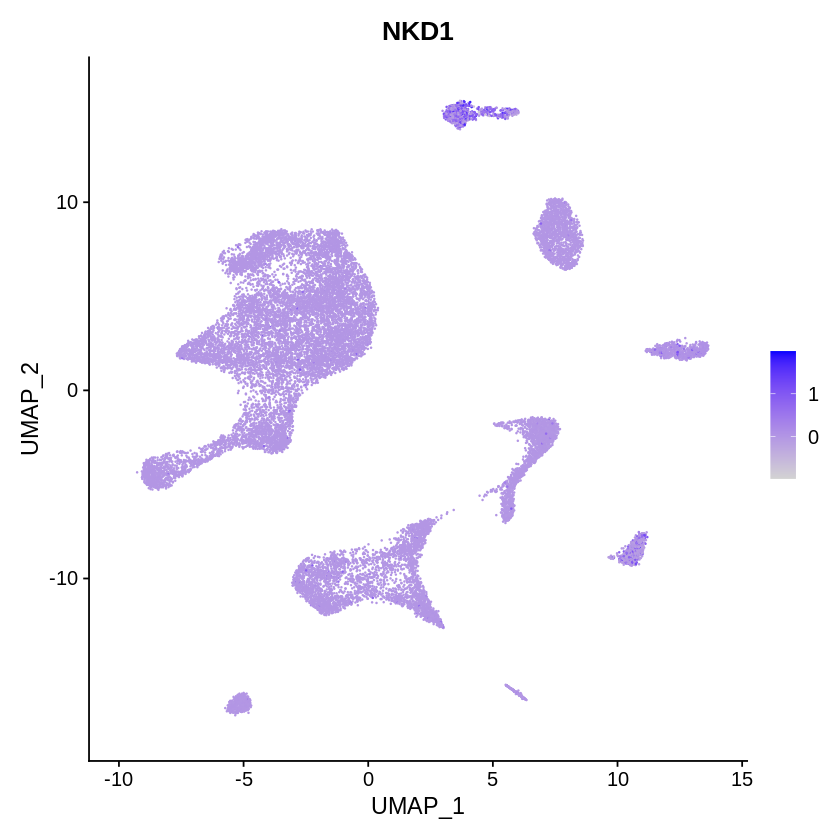

In [25]:
FeaturePlot(Excita, features = c('NKD1'))+scale_fill_gradientn(colors = brewer.pal(5,"Blues"))

In [26]:
saveRDS(Excita, file = "./processed_data/excita_2_final.rds")